In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
#Load and Explore the Dataset

from tensorflow.keras.utils import load_img, img_to_array

def load_images(base_path):
    categories = ['CXR', 'AbdomenCT', 'HeadCT', 'ChestCT', 'Hand']
    data = []
    labels = []
    img_size = (128, 128)  # Resize all images to a fixed size
    
    for i, category in enumerate(categories):
        folder_path = os.path.join(base_path, category)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            img = load_img(file_path, target_size=img_size)  # Load image
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            data.append(img_array)
            labels.append(i)  # Assign numerical label
            
    return np.array(data), np.array(labels)

# Path to the dataset
dataset_path = "C:\\Users\\sahaa\\Downloads\\CNN_dataset"
data, labels = load_images(dataset_path)

print("data loading completed")

data loading completed


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels)

# Further split the training set into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (32000, 128, 128, 3), Validation set: (8000, 128, 128, 3), Test set: (10000, 128, 128, 3)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_model(input_shape=(128, 128, 3), num_classes=5):
    model = Sequential()
    
    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    
    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Third convolutional block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten the output and feed into fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(num_classes, activation='softmax'))  # Output layer
    
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model
model = create_model()

# Display the model architecture
model.summary()

C:\Users\sahaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Data augmentation for training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test data should only be rescaled, no augmentation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Flow the data from numpy arrays for training, validation, and test sets
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = test_datagen.flow(X_val, y_val, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

In [14]:
history = model.fit(
    train_generator,         # Training data
    epochs=5,               # Number of epochs
    validation_data=validation_generator,  # Validation data
    verbose=1                
)


Epoch 1/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 304s 152ms/step - accuracy: 0.9265 - loss: 0.2245 - val_accuracy: 0.9855 - val_loss: 0.0549
Epoch 2/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 302s 151ms/step - accuracy: 0.9502 - loss: 0.1499 - val_accuracy: 0.9914 - val_loss: 0.0237
Epoch 3/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 331s 165ms/step - accuracy: 0.9565 - loss: 0.1303 - val_accuracy: 0.9885 - val_loss: 0.0330
Epoch 4/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 313s 156ms/step - accuracy: 0.9600 - loss: 0.1196 - val_accuracy: 0.9896 - val_loss: 0.0295
Epoch 5/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 307s 153ms/step - accuracy: 0.9633 - loss: 0.1136 - val_accuracy: 0.9893 - val_loss: 0.0322


In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred = model.predict(test_generator, verbose=2)  # Predictions on the test set
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability


313/313 - 13s - 42ms/step


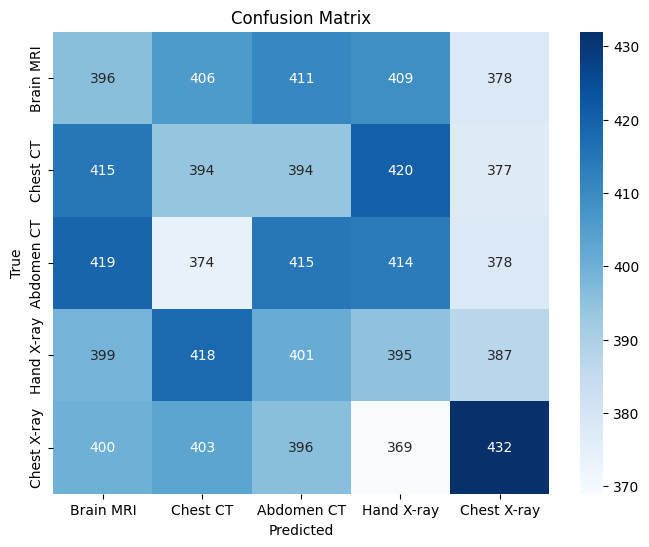

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Brain MRI', 'Chest CT', 'Abdomen CT', 'Hand X-ray', 'Chest X-ray'], yticklabels=['Brain MRI', 'Chest CT', 'Abdomen CT', 'Hand X-ray', 'Chest X-ray'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [24]:
# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred_classes, target_names=['Brain MRI', 'Chest CT', 'Abdomen CT', 'Hand X-ray', 'Chest X-ray'])
print(report)


              precision    recall  f1-score   support

   Brain MRI       0.20      0.20      0.20      2000
    Chest CT       0.20      0.20      0.20      2000
  Abdomen CT       0.21      0.21      0.21      2000
  Hand X-ray       0.20      0.20      0.20      2000
 Chest X-ray       0.22      0.22      0.22      2000

    accuracy                           0.20     10000
   macro avg       0.20      0.20      0.20     10000
weighted avg       0.20      0.20      0.20     10000



In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 20.32%
